<a href="https://colab.research.google.com/github/yvonneronoh553/Trial1/blob/main/First_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MY FIRST ML MODEL

### Import libraries

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

## load data


In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney.csv")
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


## Data preparation


### data separation as X and y

In [40]:
y = df["measured log(solubility:mol/L)"]
y

,measured log(solubility:mol/L)
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [41]:
X = df.drop("measured log(solubility:mol/L)", axis=1)
X

,Compound ID,ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...
1139,vamidothion,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


## Identify categorical columns that need encoding

In [42]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['Compound ID', 'SMILES'], dtype='object')

###Apply One Hot Encoding

In [43]:
if len(categorical_features) > 0:
    # Convert the Index object to a list of strings explicitly
    categorical_feature_names = list(categorical_features)
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_feature_names)], # Use the list of strings
        remainder='passthrough'
    )
    #X is now a csr_matrix after the encoding
    X = ct.fit_transform(X)

## Data Splitting

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2745 stored elements and shape (915, 2272)>

In [46]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 687 stored elements and shape (229, 2272)>

## Model Building

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Applying the model to make a prediction

In [48]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [50]:
print(y_lr_train_pred)

[-4.30000005e+00 -8.40000009e+00 -3.75400005e+00  3.22411493e-08
 -1.33999998e+00 -1.93999999e+00 -7.99999982e-01 -2.32000001e+00
 -3.20000003e+00 -2.21000001e+00 -4.31000005e+00 -7.27800013e+00
 -3.27000001e+00 -6.69999981e-01 -1.56000001e+00 -4.89999969e-01
 -3.18000003e+00 -4.89000005e+00 -2.17999999e+00 -4.65000005e+00
 -1.63000000e+00 -4.73000005e+00 -6.68000007e+00 -2.61600001e+00
 -4.00000004e+00 -3.39000003e+00 -3.35000004e+00 -3.43000003e+00
 -2.92800003e+00 -5.08000003e+00 -1.10999999e+00 -1.74000001e+00
 -1.64000000e+00 -7.20000009e+00 -1.96000001e+00 -3.48000002e+00
 -3.21000003e+00 -1.60000000e+00 -2.94299998e+00 -3.63000004e+00
 -1.99000002e+00 -4.45000004e+00 -2.44002081e-01 -3.40000003e+00
 -3.30000002e+00 -2.39000002e+00 -3.81000005e+00 -6.08000004e+00
 -6.99999992e-01 -2.74000001e+00 -6.20000006e+00 -3.75000004e+00
 -2.39000000e+00 -1.74000001e+00 -2.68000000e+00 -2.13000000e+00
 -8.60000012e+00 -4.41100004e+00 -2.64000000e+00 -2.30000003e+00
 -4.00000002e+00 -3.99999

In [51]:
print(y_lr_test_pred)

[-1.18581933e+00 -5.89310073e+00 -5.39601002e+00 -3.34177339e+00
 -1.09198648e+00 -5.26084604e+00 -7.18889186e-01 -3.13955335e+00
 -3.23562032e+00 -3.78186156e+00 -1.23496987e+00 -1.48183964e+00
 -4.45209622e+00 -3.80308566e+00 -3.22221562e+00 -2.49239175e+00
 -2.34755940e+00 -4.83412997e+00 -1.24949162e+00 -2.75975371e+00
 -2.96417528e+00 -1.54551193e+00 -4.33927338e+00 -3.30822907e+00
 -6.94313915e-01 -9.45651911e-01 -3.04460344e+00 -5.62612392e+00
 -2.14313783e+00 -4.32251752e+00 -1.50976608e+00 -2.99992113e+00
 -3.85447032e+00 -1.82812754e+00 -2.04036851e+00 -6.41700082e+00
 -8.54053174e-01 -2.66927203e+00 -1.85605398e+00 -1.67062240e+00
 -1.75440173e+00 -6.96345723e+00 -1.39135796e+00 -1.24167222e+00
 -1.76445525e+00 -3.69696517e+00 -5.23068548e+00 -7.72507958e-01
 -4.57497670e-01 -2.29617474e+00 -3.58079117e+00 -1.95770624e+00
 -2.25819478e+00 -3.62212230e+00 -7.65693493e+00 -5.47978936e+00
 -4.30687871e+00 -3.01555994e+00 -2.17553250e+00 -1.76668936e+00
 -4.10692537e+00 -4.25661

## Evaluate model performance

In [52]:
from sklearn.metrics  import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [59]:
print("lr_train_mse ", lr_train_mse)
print("lr_train_r2 ", lr_train_r2)
print("lr_test_mse ", lr_test_mse)
print("lr_test_r2 ", lr_test_r2)

lr_train_mse  5.306089466819045e-14
lr_train_r2  0.9999999999999879
lr_test_mse  0.7442985619241761
lr_test_r2  0.8290753721729072


In [60]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [61]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.744299,0.829075


## Random Forest

### Training the model

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

### Applying the model to make a predcition

In [63]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate Model perfomance

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [66]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.862772,0.803886,0.843002,0.806409


## Model Comparison

In [67]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.744299,0.829075
1,Random forest,0.862772,0.803886,0.843002,0.806409


## Data Visualization

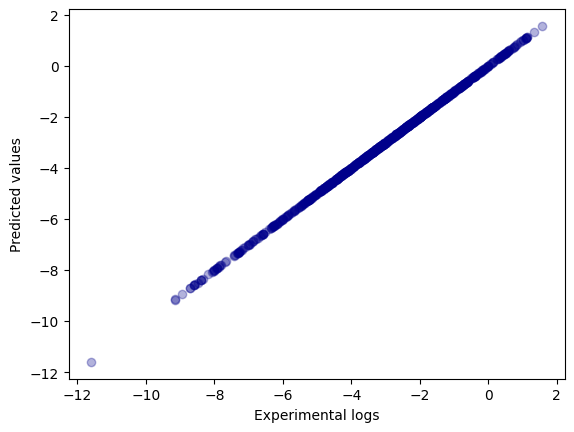

In [75]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_lr_train_pred,c="darkblue", alpha=0.3)
plt.plot()
plt.ylabel("Predicted values")
plt.xlabel("Experimental logs")
plt.show()